                                                **TEXT CLASSIFICATION OF SENTENCES DATASET**

In [502]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag


In [503]:
df=pd.read_csv('data_saad.csv')
df.head(5)

,textID,text,selected_text,classes
0,50e14c0bb8,DNAL IDENTITY CARD zz zz SURNAME: zz JUNGE zz ...,Soooo high,sa_id_card
1,e050245fbd,REPUBLIC OF SOUTH AFRICA zz zz NATIONAL IDENTI...,Both of you,sa_id_card
2,fc2cbefa9d,REPUBLIC OF SOUTH AFRICA zz NATIONAL IDENTITY ...,Wow... u just became cooler.,sa_id_card
3,2339a9b08b,REPUBLIC OF SOUTH AFRICA zz NATIONAL IDENTITY ...,"as much as i love to be hopeful, i reckon the ...",sa_id_card
4,16fab9f95b,REPUBLIC OF SOUTH AFRICA zz zz NATIONAL IDENTI...,like,sa_id_card


In [504]:
df.isnull().sum()

textID           0
text             0
selected_text    0
classes          0
dtype: int64

In [505]:
df['text'].duplicated().sum()

20

In [506]:
df[df['text'].duplicated(keep=False)]

,textID,text,selected_text,classes
129,e48b0b8a23,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,interesting.,zim_id_card
130,7de057cf40,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,is cleaning the house for her family who is co...,zim_id_card
131,9ce5570064,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,gotta restart my computer .. I thought Win7 wa...,zim_id_card
132,0c8cc71c46,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,zim_id_card
153,a05aea73d7,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,I wish I was allowed to go,zim_id_card
154,9c4817f73b,KEPUBLIC OF ZMBABWE zz NATIONAL REGISTRATION z...,if u have a friendster add me!!!!!!!!! ...,zim_id_card
155,f0c1601d8b,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,has tickets.......?,zim_id_card
156,d421fbd332,KEPUBLIC OF ZMBABWE zz NATIONAL REGISTRATION z...,"Thank you,",zim_id_card
159,43e9a93104,REPUBLIC OF ZIMBABWE zz NATIONAL REGISTRATION ...,I don`t feel confident,zim_id_card
160,401869d615,REPBUIC OF ZIMBABWE zz NATIONAL REGISTRATION z...,sad.,zim_id_card


We observe that there are 20 duplicate rows based on the 'text' attributes but the selected_text from them is different. We also observe that the all these duplicate rows belong to the same class. So,it is better to drop these duplicate rows

In [507]:
df = df.drop_duplicates(subset='text')

In [508]:
df['text'].duplicated().sum()

0

In [509]:
df.shape

(570, 4)

In [510]:
df.columns

Index(['textID', 'text', 'selected_text', 'classes'], dtype='object')

In [511]:
df=df.drop('selected_text',axis=1)

In [512]:
df.head(5)

,textID,text,classes
0,50e14c0bb8,DNAL IDENTITY CARD zz zz SURNAME: zz JUNGE zz ...,sa_id_card
1,e050245fbd,REPUBLIC OF SOUTH AFRICA zz zz NATIONAL IDENTI...,sa_id_card
2,fc2cbefa9d,REPUBLIC OF SOUTH AFRICA zz NATIONAL IDENTITY ...,sa_id_card
3,2339a9b08b,REPUBLIC OF SOUTH AFRICA zz NATIONAL IDENTITY ...,sa_id_card
4,16fab9f95b,REPUBLIC OF SOUTH AFRICA zz zz NATIONAL IDENTI...,sa_id_card


**MAPPING THE CLASSES TO NUMERICAL EQUIVALENETS**



In [513]:
df['classes'].value_counts()

classes
zim_id_card     425
sa_id_card       74
zim_passport     46
sa_license        9
sa_passport       9
zim_license       7
Name: count, dtype: int64

In [514]:
df['classes']=df['classes'].replace({'zim_id_card':0,'sa_id_card':1,'zim_passport':2,'sa_license':3,'sa_passport':4,'zim_license':5})

C:\Users\awans\AppData\Local\Temp\ipykernel_16348\1329326615.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['classes']=df['classes'].replace({'zim_id_card':0,'sa_id_card':1,'zim_passport':2,'sa_license':3,'sa_passport':4,'zim_license':5})


**SPLITTING THE DATASET INTO TEST,TRAIN AND VALIDATION SETS**

Using Sklearn test_train_split function,we randomly divide the dataset into 3 sets, testing,training and validation. We give 70% data to training,10% to validation and 20% to testing

In [515]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['classes'])
train_df, valid_df = train_test_split(train_val_df, test_size=0.125, random_state=30, stratify=train_val_df['classes'])

**COUNTING ALL THE LABELS IN EACH DATASET**

In [516]:
df['classes'].value_counts()

classes
0    425
1     74
2     46
3      9
4      9
5      7
Name: count, dtype: int64

In [517]:
train_df['classes'].value_counts()

classes
0    261
1     46
2     28
4      5
3      5
5      4
Name: count, dtype: int64

In [518]:
test_df['classes'].value_counts()

classes
0    127
1     22
2     14
4      3
3      3
5      2
Name: count, dtype: int64

In [519]:
valid_df['classes'].value_counts()

classes
0    37
1     6
2     4
5     1
4     1
3     1
Name: count, dtype: int64

We observe that all the datasets are properly balanced 

**DATA VISUALIZATION**

C:\Users\awans\AppData\Local\Temp\ipykernel_16348\2233753964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classes',data=df,palette='viridis',ax=axs[0,0])
C:\Users\awans\AppData\Local\Temp\ipykernel_16348\2233753964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classes',data=train_df,palette='viridis',ax=axs[0,1])
C:\Users\awans\AppData\Local\Temp\ipykernel_16348\2233753964.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classes',data=test_df,palette='viridis',ax=axs[1,0])
C:\Users\awans\AppData\Local\Temp\ipyk

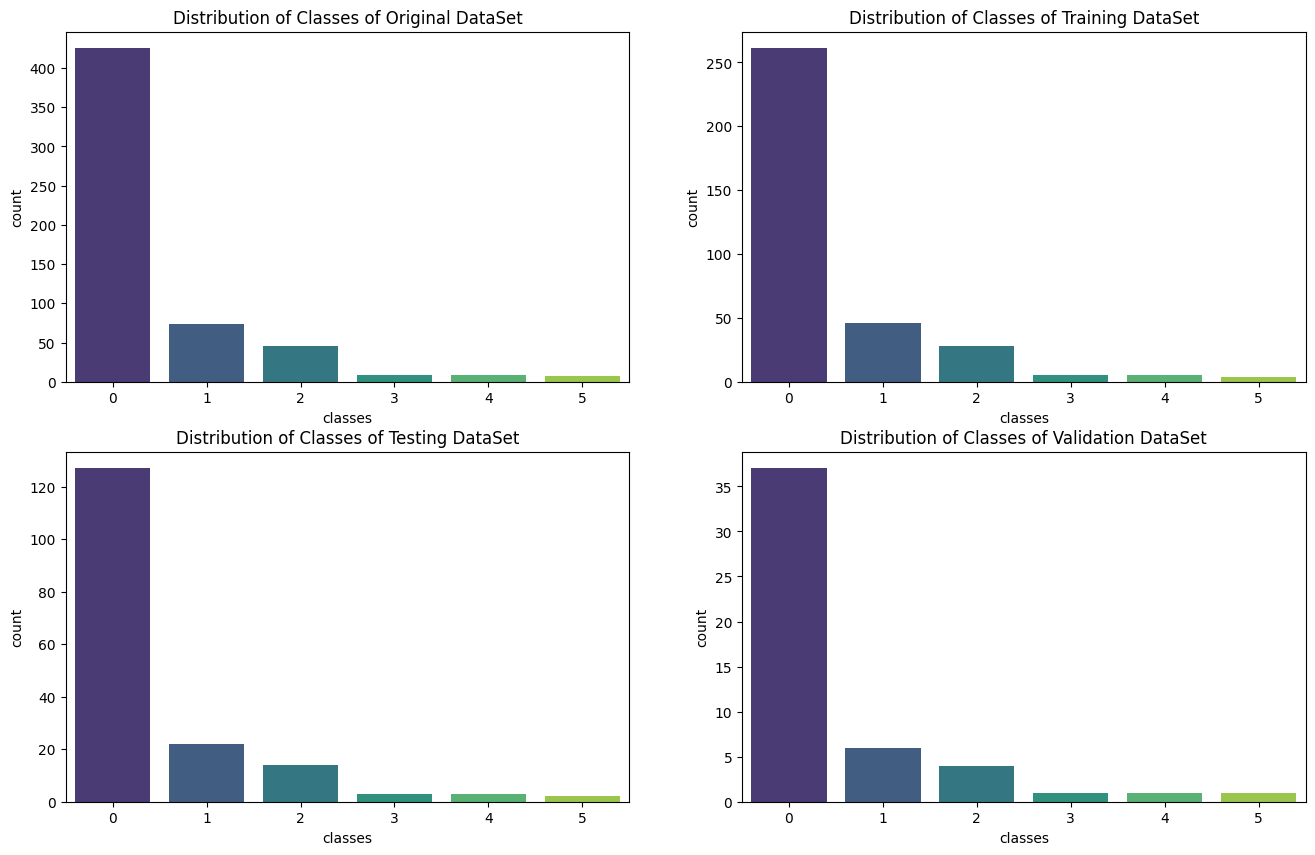

In [520]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.countplot(x='classes',data=df,palette='viridis',ax=axs[0,0])
axs[0,0].set_title('Distribution of Classes of Original DataSet')

sns.countplot(x='classes',data=train_df,palette='viridis',ax=axs[0,1])
axs[0,1].set_title('Distribution of Classes of Training DataSet')

sns.countplot(x='classes',data=test_df,palette='viridis',ax=axs[1,0])
axs[1,0].set_title('Distribution of Classes of Testing DataSet')

sns.countplot(x='classes',data=valid_df,palette='viridis',ax=axs[1,1])
axs[1,1].set_title('Distribution of Classes of Validation DataSet')

plt.show()




In [521]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

df['text'] = df['text'].apply(preprocess_text)

In [522]:
df['text']

0      dnal identity card zz zz surname zz junge zz n...
1      republic of south africa zz zz national identi...
2      republic of south africa zz national identity ...
3      republic of south africa zz national identity ...
4      republic of south africa zz zz national identi...
                             ...                        
585    republic of zimbabwe zz zz passport zz passpor...
586    republic of zimbabwe zz zz passport zz passpor...
587    republic of zimbabwe zz zz passport zz passpor...
588    republic of zimbabwe zz zz passport zz passpor...
589    republic of zimbabwe zz zz passport zz passpor...
Name: text, Length: 570, dtype: object

**USING TEXT VECTORIZOR**

TF-IDF stands for Term Frequency-Inverse Document Frequency.
TF-IDF is used to convert text data into numerical features that can be fed into a machine learning model.
For sentiment analysis, we fit the features into the vectorizor

In [523]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x=vectorizer.fit_transform(train_df['text'])
print(x.toarray())
print(vectorizer.get_feature_names_out())


[[ 0  0  0 ...  0  0 15]
 [ 0  0  0 ...  0  0 12]
 [ 0  0  0 ...  0  0 11]
 ...
 [ 0  0  0 ...  0  2 11]
 [ 0  0  0 ...  0  0 12]
 [ 0  0  0 ...  0  0 13]]
['00' '0005125389087' '0006125389087' ... 'zvishavane' 'zwe' 'zz']


**INSTANTIATING THE ChatDATASET CLASS**

We create the ChatDATASET Class for our Neural Network. We will instatiate the dataframe and the vectorizer in the constructor. We will use the __len__() method to return length of the dataframe. The __getitem__() method will be used to return the columns transformed as  tensors for our Recurrent Neural Network

In [524]:

class ChatDataset(Dataset):
    def __init__(self, df, vectorizer):
        self.df = df
        self.vectorizer = vectorizer

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['classes']
        features = self.vectorizer.transform([text]).toarray().squeeze()
        return {'text': torch.tensor(features, dtype=torch.float), 'label': torch.tensor(label, dtype=torch.long)}


**Instantiating the DataLoaders**

In [525]:

train_dataset = ChatDataset(train_df, vectorizer)
test_dataset = ChatDataset(test_df, vectorizer)
valid_dataset=ChatDataset(valid_df, vectorizer)


In [526]:



train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)
valid_loader=DataLoader(valid_dataset, batch_size=2, shuffle=True)


In [527]:
print("Number of features in vectorizer:", len(vectorizer.get_feature_names_out()))

Number of features in vectorizer: 1542


**BUILDING THE GRU MODEL**

As the dataset is small, we will use a GRU model

In [528]:

class LSTM_MODEL(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LSTM_MODEL, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _,(hidden,_)=self.lstm(x)
        output=self.fc(hidden.squeeze(0))
        return output

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTM_MODEL(input_dim=1542, hidden_dim=128, output_dim=6).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

**EVALUATING THE MODEL**

In [529]:
def evaluate(loader,criterion):
    model.eval()
    total=0
    with torch.no_grad():
        for batch in loader:
            text=batch['text'].to(device).unsqueeze(1)
            label=batch['label'].to(device)

            output=model(text)
       
            loss=criterion(output,label)
            total+=loss.item()

    avg=total/len(loader)
    return avg

**MODEL ACCURACY FUNCTION**

In [530]:
from sklearn import metrics
def model_eval(loader):
    model.eval()
    pred=[]
    lab=[]
    correct = 0
    total = 0
    with torch.no_grad():

        for batch in loader:
            text = batch['text'].to(device).unsqueeze(1)  
            labels = batch['label'].to(device)
        
            outputs = model(text)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
            pred.extend(predicted.cpu().numpy())
            lab.extend(labels.cpu().numpy())

        accuracy = correct / total
        print(f'Accuracy: {(accuracy * 100)}%')


    return pred,lab

**TRAINING THE MODEL**

In [531]:

for epoch in range(8):
    model.train()
    total_loss = 0
    for batch in train_loader:
        text = batch['text'].to(device).unsqueeze(1) 
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(text)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    

    avg_train_loss = total_loss / len(train_loader)
    avg_valid_loss=evaluate(valid_loader,criterion)
    print(f'Epoch {epoch + 1},Training Loss: {avg_train_loss}, Validation Loss:{avg_valid_loss} ')
    print('Testing Accuracy:')
    model_eval(test_loader)
    print('Validation Accuracy:')
    model_eval(valid_loader)



Epoch 1,Training Loss: 0.6079279942704099, Validation Loss:0.23965199738740922 
Testing Accuracy:
Accuracy: 94.15204678362574%
Validation Accuracy:
Accuracy: 92.0%
Epoch 2,Training Loss: 0.06685136345148619, Validation Loss:0.1103506326302886 
Testing Accuracy:
Accuracy: 98.83040935672514%
Validation Accuracy:
Accuracy: 98.0%
Epoch 3,Training Loss: 0.012939086130687168, Validation Loss:0.07476132150972262 
Testing Accuracy:
Accuracy: 99.41520467836257%
Validation Accuracy:
Accuracy: 98.0%
Epoch 4,Training Loss: 0.004946215875845934, Validation Loss:0.062210784940980375 
Testing Accuracy:
Accuracy: 99.41520467836257%
Validation Accuracy:
Accuracy: 98.0%
Epoch 5,Training Loss: 0.002810798569366203, Validation Loss:0.05981840360618662 
Testing Accuracy:
Accuracy: 99.41520467836257%
Validation Accuracy:
Accuracy: 98.0%
Epoch 6,Training Loss: 0.0018326786587048057, Validation Loss:0.054874024256132546 
Testing Accuracy:
Accuracy: 99.41520467836257%
Validation Accuracy:
Accuracy: 98.0%
Epoch

In [532]:
print('Testing')
_,_=model_eval(test_loader)
_,_=model_eval(valid_loader)

Testing
Accuracy: 99.41520467836257%
Accuracy: 98.0%


**REMAPPING FOR PREDICTED VALUES**

In [533]:
map={0:'zim_id_card',1:'sa_id_card',2:'zim_passport',3:'sa_license',4:'sa_passport',5:'zim_license'}

**PREDICTING ON INDIVIDUAL TEXTS**

In [537]:


def predict(text,vectorizer,model,device,class_map):
    model.eval()

    features = vectorizer.transform([text]).toarray().squeeze()
    features = torch.tensor(features, dtype=torch.float).unsqueeze(0).unsqueeze(1).to(device)  

    with torch.no_grad():
        output = model(features)
    
    _, predicted = torch.max(output, 1)
    id= predicted.item()
    pred_class=class_map.get(id,'Unknown')
    return pred_class

text='PASSPORT zz zz PN zz ZIM zz DUBE zz NODBZITHA zz ZIMBAIWEAN zz BULAWAYO zz M zz 2203/1983 zz 19/02/2004 zz ZIMBABWE zz 1802/2014 REGSTRAR GENERAL zz PNZIMDUBE<<NQ0BIZITHA<<< zz AN795650<5ZIM8303224M1402184080631368W39<<50'
predicted_class = predict(text, vectorizer, model, device,map)

print(predicted_class)

zim_passport


In [538]:
text='PASSPORT zz zz CN83 7983 zz PN zz CHAKWENGA zz ZIMBABWEAN zz 25125413 F07 zz M zz MASVINGO zz 17/12/1993 zz ZIMBABWE zz 16/10/2020 zz REGISTRAR GENCRALHRE zz 15/10/2030 zz DRIVER zz PNZIMCHAKWENGA<<<NIMROD< zz CNB37983<1ZIM91020101208270253741C03<<43'
predicted_class = predict(text, vectorizer, model, device,map)

print(predicted_class)

zim_passport


In [542]:
text='DENNGEICENCE SOUTH AFRICA ZA CARTADECONDUCAO POKIJ MICHAEL IDNo.: 02/7701165121086 MALE Birth: o1/oo/1999 ZA Restriction LiconceNumber 206170042R2M No.: 7 Vaii 30/03/2019 29/03/2024 issued. Us A EC Venicierestrietion: 0 0 16/01/2003 29/04/201'
predicted_class = predict(text, vectorizer, model, device,map)

print(predicted_class)

sa_license


In [535]:
test_df['text'][119]

'REPUBLIC ZIMBABWE zz NATIONAL REGISTRATION zz 63-2043479 M 38 CIT M zz MUTASA zz NANE zz MAKONI zz 22/08/1996 zz OMAWERE zz C zz PLACE KAJOKOTO zz DATE 24/12/2014 zz OF zz FNGSRPRINT'

In [536]:
for i in range(1,110,10):
    text=df['text'][i]
    predicted_class = predict(text, vectorizer, model, device,map)

    print(predicted_class)

sa_id_card
sa_id_card
sa_id_card
sa_id_card
sa_id_card
sa_id_card
sa_id_card
sa_id_card
sa_license
sa_passport
zim_id_card


In [ ]:
df[df['text']=='THE REPUBLIC OF ZIMBABWE zz zz PASSP0RT zz PN zz AE164852 zz CHIPANDE zz PRITORIA zz 56-6876634T57 zz ZIMBABWEAN zz M zz 04/05/1987 zz 12/05/2023 ZIMBARWE zz 11/07/2032 HEGISTHAR GENERAL-HRE zz PNZWECHIPANDE<<PRITORIA<<<CCCEC zz AE164852 <6ZWE9 109032 M320711056119 305T56CCCC<BD']
